In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('data_progress/4 PZZ.xlsx')
df["geocodes"] = df.geocodes.apply(eval)

In [3]:
df.columns

Index(['fio', 'comment', 'resolution', 'part', 'page', 'exact_page', 'orig_id',
       'list_flag', 'fio_n', 'fio_n_popularity', 'comment_len',
       'resolution_len', 'comment_popularity', 'resolution_popularity',
       'comment_list_popularity', 'multiplier', 'comment_class_manual',
       'resolution_class_manual', 'comment_class_prediction',
       'resolution_class_prediction', 'comment_class', 'resolution_class',
       'geocodes', 'geocodes_number'],
      dtype='object')

In [4]:
df.head()

,fio,comment,resolution,part,page,exact_page,orig_id,list_flag,fio_n,fio_n_popularity,...,comment_list_popularity,multiplier,comment_class_manual,resolution_class_manual,comment_class_prediction,resolution_class_prediction,comment_class,resolution_class,geocodes,geocodes_number
0,Захаренко В. А.,Во все разделы правил землепользования и застр...,"Предложения, относящиеся к предмету публичных ...",1,1,True,0,False,Захаренко В. А.,2.0,...,1,1,-1.0,-1.0,-1,-1,-1,-1,"[{'house': None, 'coordinates': [37.612416, 55...",1
1,Калантарова Ю. В.,На основании вступившего в законную силу судеб...,"Предложения, относящиеся к предмету публичных ...",1,1,True,1,False,Калантарова Ю. В.,3.0,...,1,1,-1.0,-1.0,-1,-1,-1,-1,"[{'house': None, 'coordinates': [37.612416, 55...",1
2,Ткач Е. В.,"В картах ПЗЗ не отражены ""Защитные зоны ОКН"" (...",Замечание рекомендовано к учёту. Рекомендовать...,1,5,True,2,False,Ткач Е. В.,4.0,...,1,1,-1.0,-1.0,-1,-1,-1,-1,[],0
3,Крупенина О. Н.,"На карте Градостроительного зонирования ""Грани...",1. Предложение предусмотрено проектом ПЗЗ. На ...,1,6,True,3,False,Крупенина О. Н.,1.0,...,1,1,1.0,-1.0,-1,-1,1,-1,[],0
4,Терехов А. С.,Внести в Проект правил землепользования и заст...,Предложение не рекомендовано к учёту. Отсутств...,1,6,True,4,False,Терехов А. С.,2.0,...,1,1,-1.0,-1.0,-1,-1,-1,-1,"[{'house': None, 'coordinates': [37.603298, 55...",1


# Общая статистика

In [5]:
df.groupby('comment_class').multiplier.sum()

comment_class
-1    61465
 0     6777
 1    60610
Name: multiplier, dtype: int64

# Популярные люди

In [6]:
fios_top = df.groupby(by=['fio_n']).page.count().sort_values(ascending=False)

In [7]:
fios_top[:30]

fio_n
Житель              81
Степаненко С. В.    47
Решение С. Д.       29
Участник П. С.      25
Иванов А. А.        25
Гугушина Ю. Г.      24
Иванов А. В.        24
Андреев И. Ф.       23
Попов А. В.         22
Владимировна        22
Кузнецов А. В.      21
Александровна       19
Попова Е. А.        19
Чурюмова В. Ю.      19
Александрович       19
Волкова Е. В.       18
Глаголева           18
Андреева А. С.      17
Иванова Е. В.       17
Решение С. М.       16
Николаевна          16
Ивановна            16
Иванова М. В.       16
Кузнецова Н. В.     16
Новикова Е. В.      16
Морозов А. В.       16
Петров А. А.        16
Иванов В. В.        15
Самитов А. А.       15
Кузнецов А. А.      15
Name: page, dtype: int64

Сколько раз повторяется одно и то же ФИО (кол-во повторов ФИО - кол-во упоминаний с таким кол-вом повторов)

In [8]:
fios_top.sort_values(ascending=False).value_counts().sort_index()

1     85340
2      7294
3      1925
4       697
5       316
6       176
7        99
8        51
9        34
10       28
11       12
12       12
13        9
14        9
15        4
16        8
17        2
18        2
19        4
21        1
22        2
23        1
24        2
25        2
29        1
47        1
81        1
Name: page, dtype: int64

# Популярные комментарии

Построение графика повторяемости комментариев

In [9]:
x = range(2, 101)
df13 = df[(df.part<4)&(df.list_flag==False)]
df13p = df13[df13.comment_class==1]
df13pp = df13p[df13p.resolution_class==1]
df13n = df13[df13.comment_class==-1]
df13np = df13n[df13n.resolution_class==1]

In [10]:
y_p = [sum(df13p.comment_popularity>=i) for i in tqdm(x)]
y_pp = [sum(df13pp.comment_popularity>=i) for i in tqdm(x)]
y_n = [sum(df13n.comment_popularity>=i) for i in tqdm(x)]
y_np = [sum(df13np.comment_popularity>=i) for i in tqdm(x)]

100%|██████████| 99/99 [00:00<00:00, 382.56it/s]


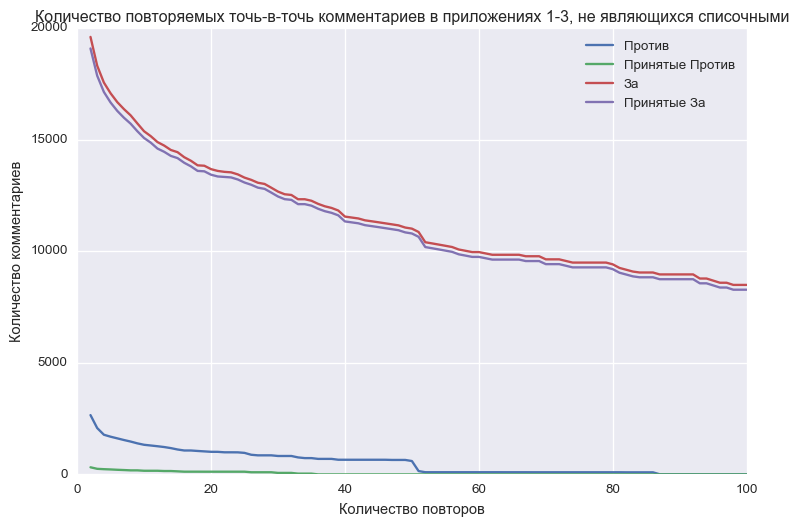

In [11]:
plt.figure(figsize=(9,6), dpi=96)
plt.plot(x, y_n)
plt.plot(x, y_np)
plt.plot(x, y_p)
plt.plot(x, y_pp)
plt.legend(['Против', 'Принятые Против', 'За','Принятые За'])
plt.title('Количество повторяемых точь-в-точь комментариев в приложениях 1-3, не являющихся списочными')
plt.xlabel('Количество повторов')
plt.ylabel('Количество комментариев')

In [12]:
y_np[-1]

0

In [13]:
y_pp[-1]

8275

# Разброс популярных комментариев по страницам

У меня вызывают большое подозрение комментарии, которые повторяются кучу раз добуквенно в разных местах документа. Комментарий длиной в 1000 символов ну не может случайно повториться на разных страницах с интервалом в 1000.

In [14]:
top_comments_dict = df[(~df.list_flag)&(df.comment_len>60)].comment.value_counts()
top_comments = list(top_comments_dict[:100].index)

In [15]:
for c in top_comments[:20]:
    print(top_comments_dict[c], c)
    print('\n', sorted(set(df[df.comment==c].page)))
    print('\n\n---\n\n')

1540 Я , житель Юго-Западного округа Москвы, выступаю за равномерное и гармоничное развитие нашего города и поэтому поддерживаю проект Правил землепользования и застройки. Правила землепользования и застройки обеспечат своевременное строительство новых социальных объектов, обновление и грамотное использование промышленных территорий, защиту сложившейся городской среды и исторической застройки старых московских районов. Правила землепользования и застройки сделают сферу строительства в Москве прозрачной и упорядоченной, минимизируют бюрократическую волокиту и коррупционную составляющую, а значит, сделают наш город более благополучным. Я поддерживаю проект Правил землепользования и застройки г. Москвы

 [6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 

 [8341, 8342, 8343, 8344, 8345, 8348, 8349]


---


73 С проектом ПЗЗ ознакомлен. Проект поддерживаю,в СЗАО необходимо строительство новых детских садов и школ.

 [9672, 9679, 9680, 9681, 9682]


---




-----